In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
processes = [1, 2, 4, 8, 16, 32, 64]

f1_str = r"\frac{1}{(x -1)^2}"
f2_str = r"\frac{1 + cos(x)^2}{1 + cos(2x)}"

f1 = {
     "1e-5": [0.04, 1.04, 1.05, 1.06, 1.1, 1.17, 1.33],
     "1e-6": [0.06, 1.05, 1.05, 1.06, 1.1, 1.17, 1.34],
     "1e-7": [0.31, 1.18, 1.11, 1.1, 1.12, 1.17, 1.34],
     "1e-8": [2.82, 2.43, 1.74, 1.41, 1.28, 1.29, 1.39],
     "1e-9": [27.86, 14.97, 8.01, 4.54, 2.84, 2.04, 1.78],

}

f2 = {
     "1e-5": [0.04, 1.04, 1.05, 1.06, 1.1, 1.17, 1.33],
     "1e-6": [0.1, 1.07, 1.06, 1.07, 1.1, 1.17, 1.33],
     "1e-7": [0.66, 1.36, 1.21, 1.15, 1.15, 1.19, 1.34],
     "1e-8": [6.29, 4.17, 2.61, 1.86, 1.49, 1.41, 1.46],
     "1e-9": [62.51, 32.42, 16.63, 9.4, 5.05, 3.29, 2.62],
}

errors = sorted(f1.keys())

f1_array = np.array([val for val in f1.values()])
f2_array = np.array([val for val in f2.values()])

errors, f1_array, f2_array

(['1e-5', '1e-6', '1e-7', '1e-8', '1e-9'],
 array([[ 0.04,  1.04,  1.05,  1.06,  1.1 ,  1.17,  1.33],
        [ 0.06,  1.05,  1.05,  1.06,  1.1 ,  1.17,  1.34],
        [ 0.31,  1.18,  1.11,  1.1 ,  1.12,  1.17,  1.34],
        [ 2.82,  2.43,  1.74,  1.41,  1.28,  1.29,  1.39],
        [27.86, 14.97,  8.01,  4.54,  2.84,  2.04,  1.78]]),
 array([[4.000e-02, 1.040e+00, 1.050e+00, 1.060e+00, 1.100e+00, 1.170e+00,
         1.330e+00],
        [1.000e-01, 1.070e+00, 1.060e+00, 1.070e+00, 1.100e+00, 1.170e+00,
         1.330e+00],
        [6.600e-01, 1.360e+00, 1.210e+00, 1.150e+00, 1.150e+00, 1.190e+00,
         1.340e+00],
        [6.290e+00, 4.170e+00, 2.610e+00, 1.860e+00, 1.490e+00, 1.410e+00,
         1.460e+00],
        [6.251e+01, 3.242e+01, 1.663e+01, 9.400e+00, 5.050e+00, 3.290e+00,
         2.620e+00]]))

In [3]:
def speedup(f_array: list):
    """
    Parameters:
        f_array: np.array()
            Array where each row is a time of the execution for a certain step size and
            each column represents number of processes used to execute program.
    """
    return f_array[:, 0].reshape(-1, 1) / f_array[:, 1:]

def efficiency(f_array: list, processes: list):
    """
    Parameters:
        f_speed_pu: np.array()
            Array where each row is a time of the execution for a certain step size and
            each column represents number of processes used to execute program.
        processes: list[int]
            List with number of processes used for program execution.
            Note: for effeciency and speed up we don't need to take the case with 1 process,
            so it is ignored.
            
    """
    return speedup(f_array) / np.array(processes[1:])

In [4]:
def performance_plot(performance_values: np.array, errors: list, function: str):
    """
        Plotting graph of the number of processes to the execution time.
    """
    plt.figure(figsize=(15, 9))

    for err, values in zip(errors, performance_values):
        plt.plot(processes, values, marker='o', label=f'stepsize {err}')

    plt.grid()   
    plt.legend(prop={'size': 16})
    plt.ylabel('Time')
    plt.xlabel('Processes')
    plt.title(fr'Performance time for the function ${function}$', fontsize=25)
    plt.show()
    

def speedup_plot(speedup_values: np.array, errors: list, function):
    """
        Plotting graph of the speedup of processes to the execution time.
    """
    plt.figure(figsize=(15, 10))

    for err, values in zip(errors, speedup_values):
        plt.plot(processes[1:], values, marker='o', label=f'stepsize {err}')

    plt.xlim([1, 65])

    plt.legend(prop={'size': 14}, loc='upper left')   
    plt.grid()  
    plt.ylabel('Speed up')
    plt.xlabel('Processes')
    plt.title(fr'Speed up for the function ${function}$', fontsize=25)
    plt.show()
    
    

def efficiency_plot(efficiency_values: np.array, errors: list, function: str):
    """
        Plotting graph of the efficiency of processes to the execution time.
    """
    plt.figure(figsize=(15, 10))

    for err, values in zip(errors, efficiency_values):
        plt.plot(processes[1:], values, marker='o', label=f'stepsize {err}')


    plt.grid()  
    plt.xlim([1, 65])

    plt.legend(prop={'size': 16})
    plt.ylabel('Efficiency')
    plt.xlabel('Processes')
    plt.title(fr'Efficiency for the function ${function}$', fontsize=25)
    plt.show()


# Example Function 1:
# $\frac{1}{(x -1)^2}$

In [5]:
f1_speedup_values = speedup(f1_array)
f1_speedup_values

array([[ 0.03846154,  0.03809524,  0.03773585,  0.03636364,  0.03418803,
         0.03007519],
       [ 0.05714286,  0.05714286,  0.05660377,  0.05454545,  0.05128205,
         0.04477612],
       [ 0.26271186,  0.27927928,  0.28181818,  0.27678571,  0.26495726,
         0.23134328],
       [ 1.16049383,  1.62068966,  2.        ,  2.203125  ,  2.18604651,
         2.02877698],
       [ 1.86105544,  3.47815231,  6.13656388,  9.80985915, 13.65686275,
        15.65168539]])

In [6]:
f1_efficiency_values = efficiency(f1_array, processes)
f1_efficiency_values

array([[1.92307692e-02, 9.52380952e-03, 4.71698113e-03, 2.27272727e-03,
        1.06837607e-03, 4.69924812e-04],
       [2.85714286e-02, 1.42857143e-02, 7.07547170e-03, 3.40909091e-03,
        1.60256410e-03, 6.99626866e-04],
       [1.31355932e-01, 6.98198198e-02, 3.52272727e-02, 1.72991071e-02,
        8.27991453e-03, 3.61473881e-03],
       [5.80246914e-01, 4.05172414e-01, 2.50000000e-01, 1.37695312e-01,
        6.83139535e-02, 3.16996403e-02],
       [9.30527722e-01, 8.69538077e-01, 7.67070485e-01, 6.13116197e-01,
        4.26776961e-01, 2.44557584e-01]])

### Performance

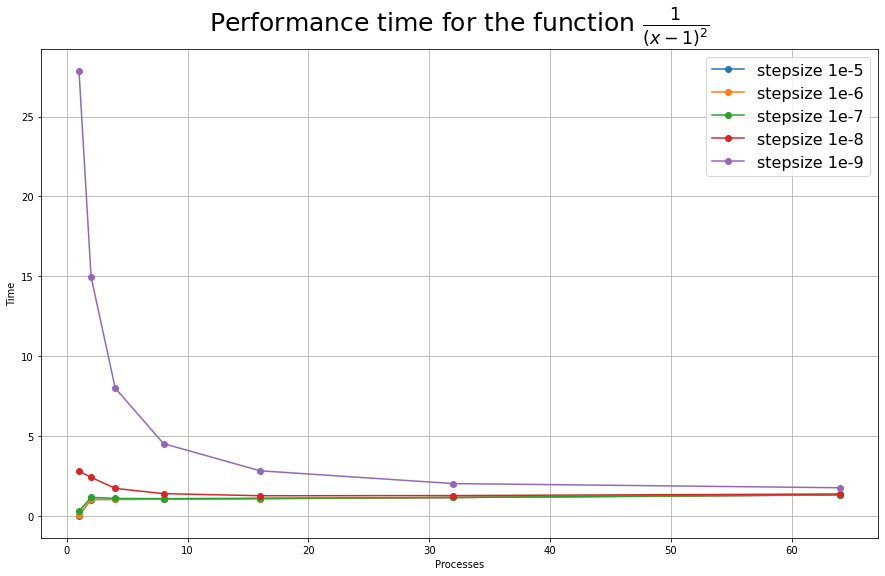

In [7]:
performance_plot(f1_array, errors, f1_str)

### Speed Up

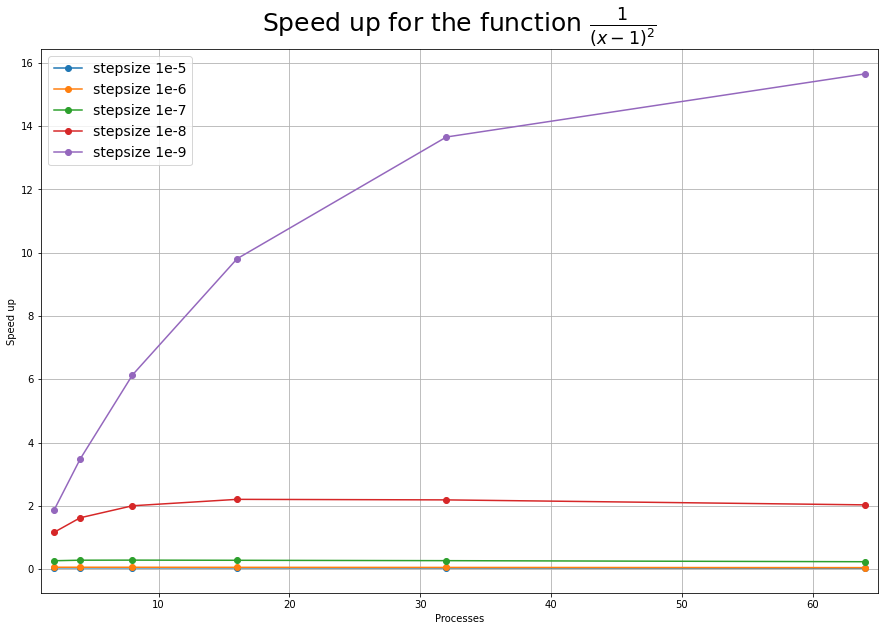

In [8]:
speedup_plot(f1_speedup_values, errors, f1_str)

### Efficiency

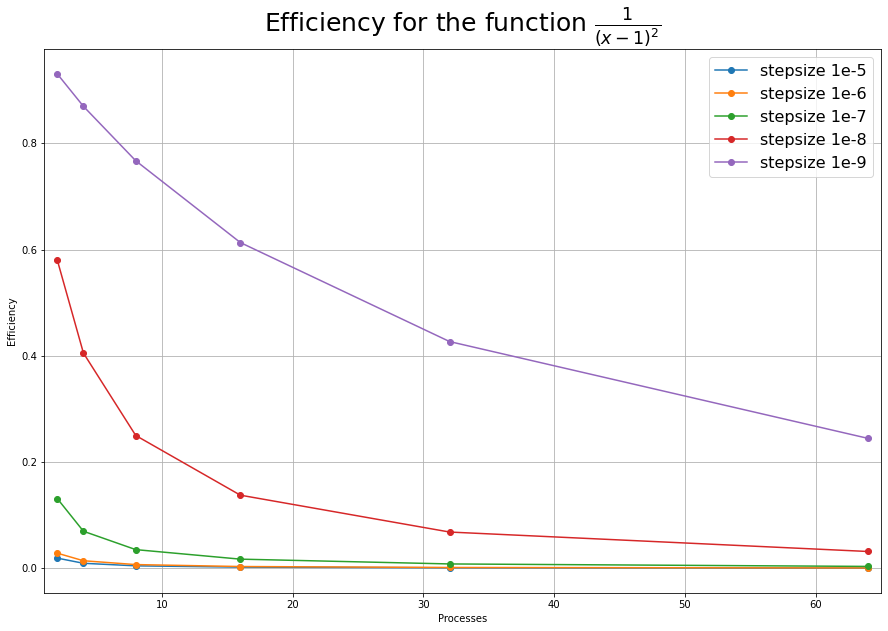

In [9]:
efficiency_plot(f1_efficiency_values, errors, f1_str)

# Example Function 2
# $\frac{1 + cos(x)^2}{1 + cos(2x)}$

In [10]:
f2_speedup_values = speedup(f2_array)
f2_speedup_values

array([[ 0.03846154,  0.03809524,  0.03773585,  0.03636364,  0.03418803,
         0.03007519],
       [ 0.09345794,  0.09433962,  0.09345794,  0.09090909,  0.08547009,
         0.07518797],
       [ 0.48529412,  0.54545455,  0.57391304,  0.57391304,  0.55462185,
         0.49253731],
       [ 1.50839329,  2.40996169,  3.38172043,  4.22147651,  4.46099291,
         4.30821918],
       [ 1.92813078,  3.75886951,  6.65      , 12.37821782, 19.        ,
        23.85877863]])

In [11]:
f2_efficiency_values = efficiency(f2_array, processes)
f2_efficiency_values

array([[1.92307692e-02, 9.52380952e-03, 4.71698113e-03, 2.27272727e-03,
        1.06837607e-03, 4.69924812e-04],
       [4.67289720e-02, 2.35849057e-02, 1.16822430e-02, 5.68181818e-03,
        2.67094017e-03, 1.17481203e-03],
       [2.42647059e-01, 1.36363636e-01, 7.17391304e-02, 3.58695652e-02,
        1.73319328e-02, 7.69589552e-03],
       [7.54196643e-01, 6.02490421e-01, 4.22715054e-01, 2.63842282e-01,
        1.39406028e-01, 6.73159247e-02],
       [9.64065392e-01, 9.39717378e-01, 8.31250000e-01, 7.73638614e-01,
        5.93750000e-01, 3.72793416e-01]])

### Performance

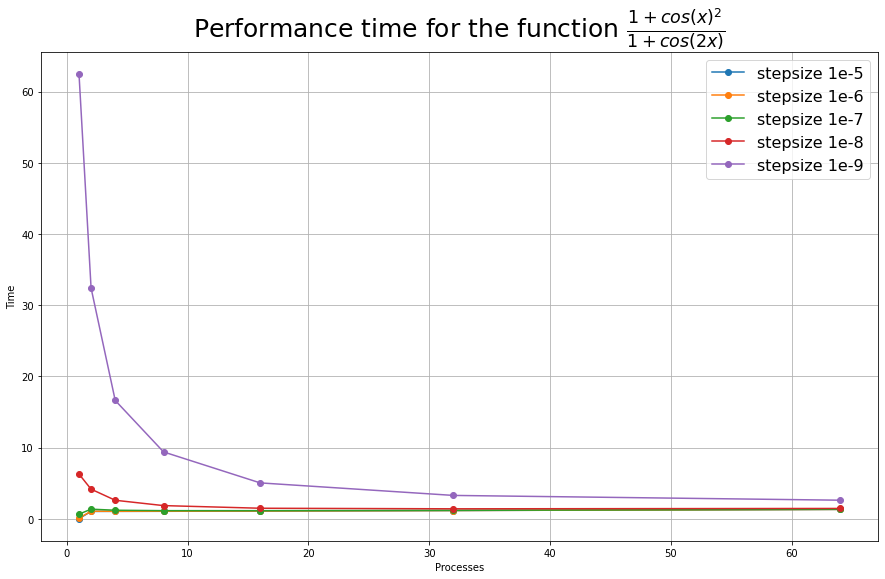

In [12]:
performance_plot(f2_array, errors, f2_str)

### Speed Up

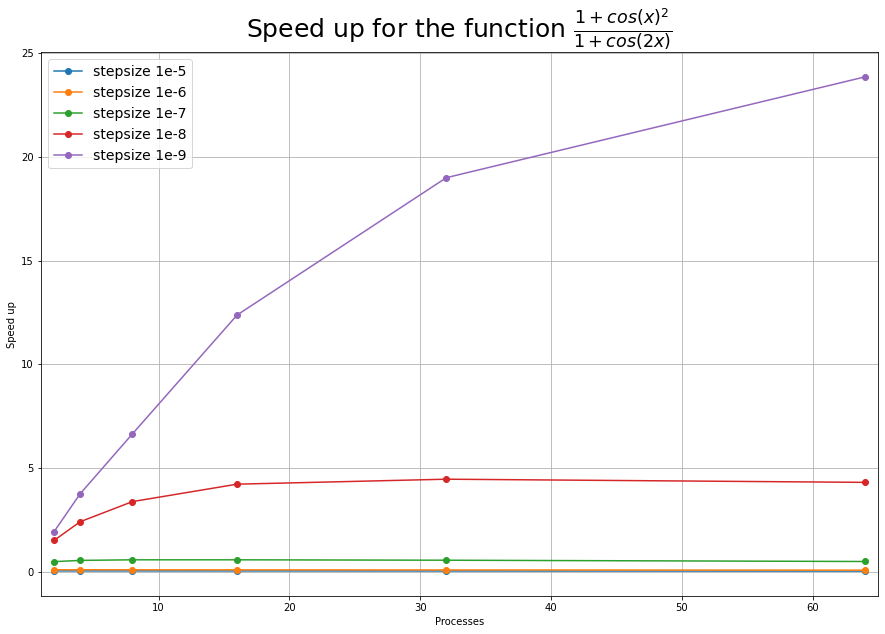

In [13]:
speedup_plot(f2_speedup_values, errors, f2_str)

### Efficiency

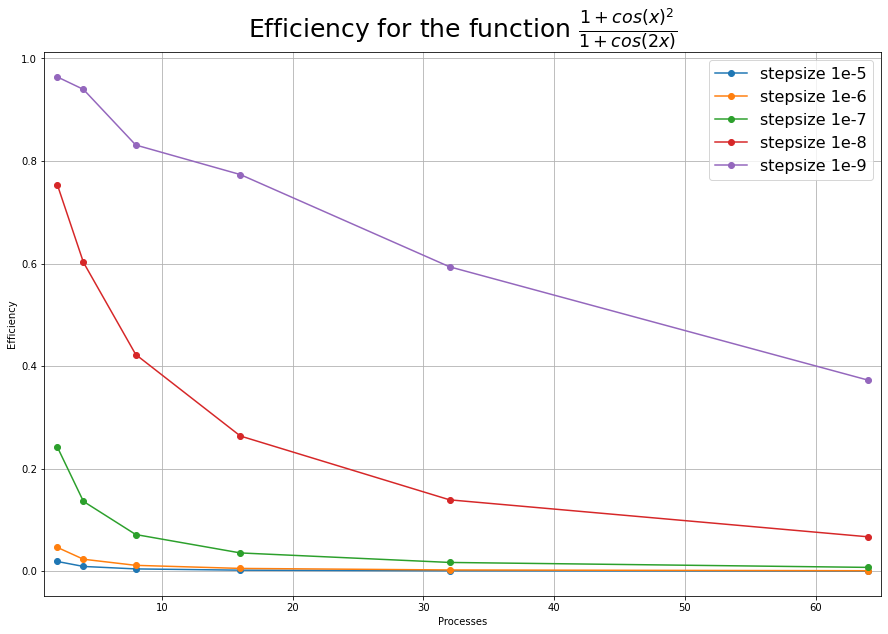

In [14]:
efficiency_plot(f2_efficiency_values, errors, f2_str)